<IPython.core.display.Javascript object>


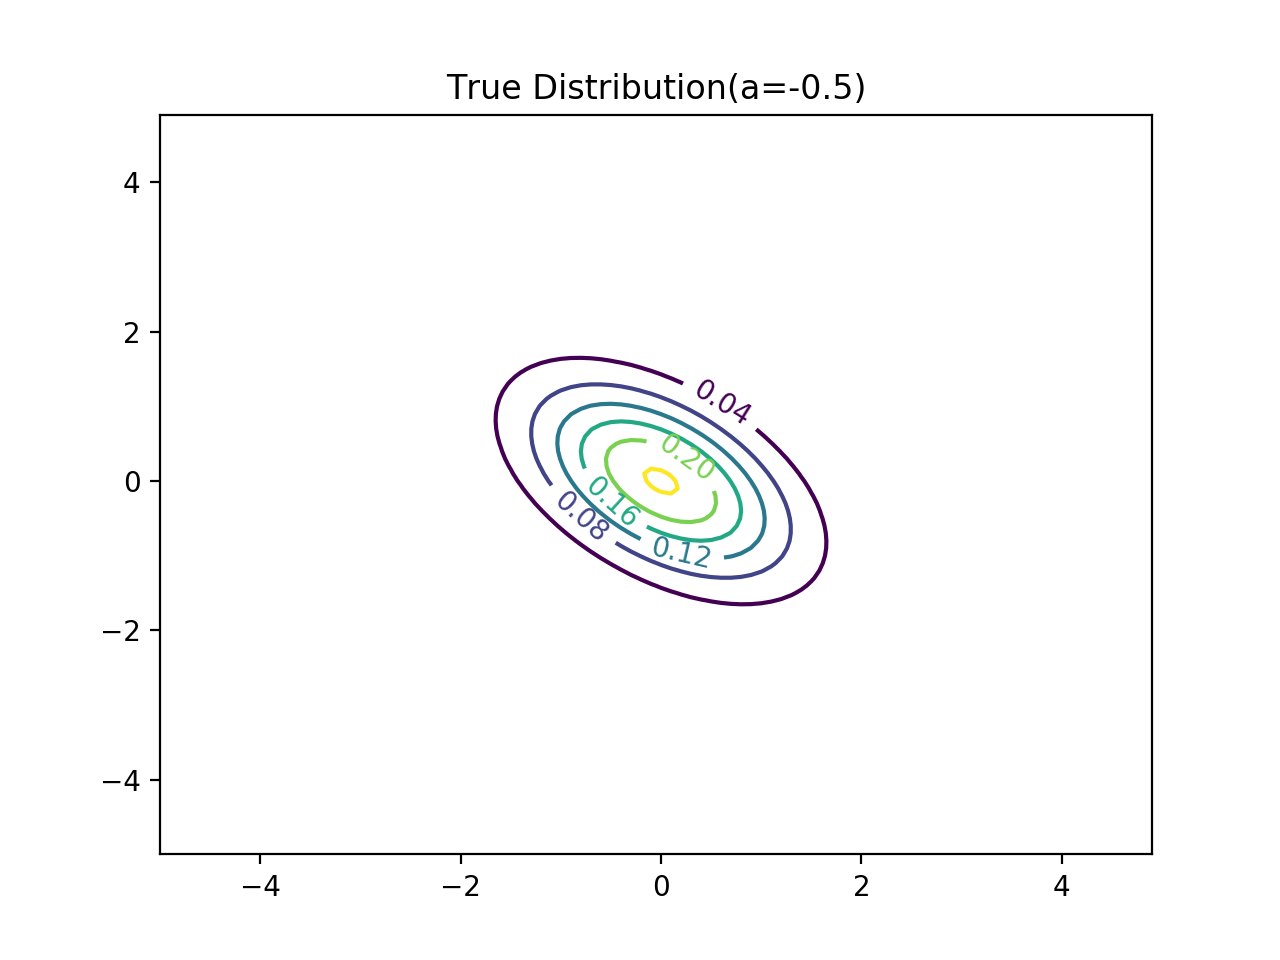

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

a = -0.5

# print a true gauss distribution
def gauss(x, y, a):
    def _gauss(x, y):
        """Multivariate normal distribution (two variables)"""
        mu = np.array([0, 0])
        sigma = (1 - a*a) * np.array([[1 , a],
                                      [a,  1]])
        det = np.linalg.det(sigma)
        inv_sigma = np.linalg.inv(sigma)

        x_c = np.array([x, y]) - mu
        return np.exp(- x_c.dot(inv_sigma).dot(x_c[np.newaxis, :].T)/2.0) / (2*np.pi*np.sqrt(det))
    
    z = np.vectorize(_gauss)(x, y)
    return z

def plot_gauss():
    t = np.arange(-5, 5, 0.1)
    X, Y =np.meshgrid(t, t)
    Z = gauss(X, Y, a)

    plt.title('True Distribution(a={})'.format(a))
    c = plt.contour(X, Y, Z)
    c.clabel(fmt='%1.2f', fontsize=10)

plot_gauss()
plt.show()

<IPython.core.display.Javascript object>


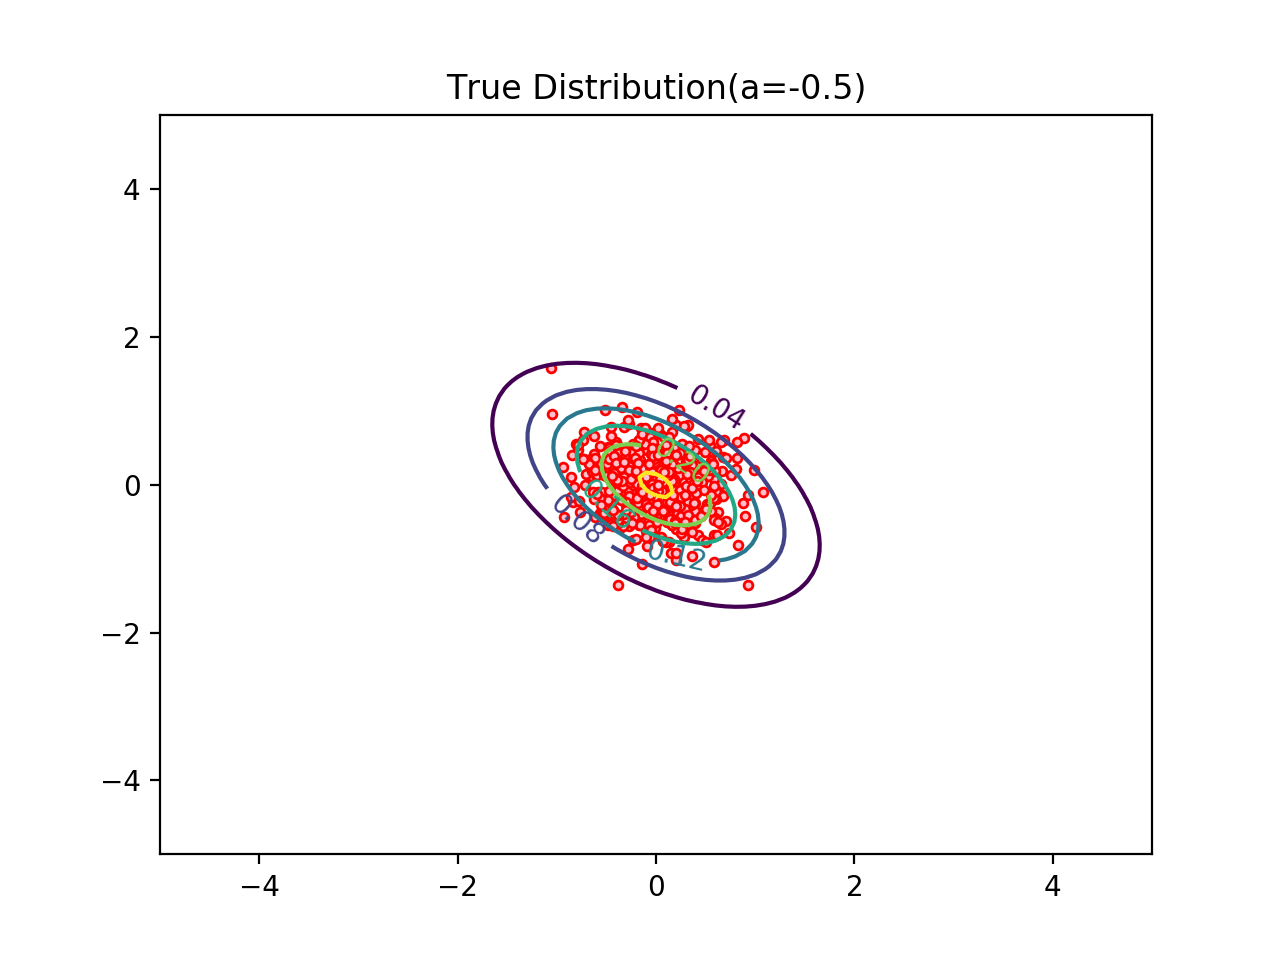

In [2]:
# try gibbs sampling
def gibbs_sampling(a, step, burn_in):
    x = np.zeros(2) # initial x
    samples = np.array(x)
    for i in range(step):
        denomi = 1 / np.sqrt(2*np.pi)
        x[0] = denomi * np.random.normal(a*x[1], 1) # mu=ax[1], sigma=1
        samples = np.append(samples, (x))
        x[1] = denomi * np.random.normal(a*x[0], 1)
        samples = np.append(samples, (x))
    print(x.shape)
    print((x).shape)
    print(samples.shape)
    samples = samples.reshape((2*step+1, x.shape[0])) # +1 means initial x
    print(samples.shape)
    
    return samples


def onetime_gibbs_sampling(_):
    denomi = 1 / np.sqrt(2*np.pi)
    x[0] = denomi * np.random.normal(a*x[1], 1) # mu=ax[1], sigma=1
    x[1] = denomi * np.random.normal(a*x[0], 1)
    
    plt.scatter(x[0], x[1], s=10, c='pink', edgecolor='red')
    plt.ylim(-5,5)
    plt.xlim(-5,5)

anim_plot = True
if anim_plot:
    fig = plt.figure()
    x = np.zeros(2)
    ani = animation.FuncAnimation(fig, onetime_gibbs_sampling, interval=10, blit=True)
else:
    step = 3000
    burn_in = 1000
    samples = gibbs_sampling(a, step, burn_in)
    plt.scatter(samples[burn_in:, 0], samples[burn_in:, 1], s=10, c='pink', alpha=0.2, edgecolor='red')

# ani.save('gibbs_sampling.gif', writer='imagemagick')
plot_gauss()
plt.show()